### Problem statement
Build the linear regression model using scikit learn in boston data to predict
'Price' based on other independent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# loading dataset and converting to Pandas DataFrame
df = load_boston()
boston = pd.DataFrame(data=df.data,columns=df.feature_names)
boston['PRICE'] = df.target

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
boston.shape

(506, 14)

In [5]:
# Checking missing values
boston.isna().sum().sum() # No missing values present

0

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Exploratory Data Analysis

In [7]:
# function for plotting KDE Plot along with mean,median and quantiles
def kde_viz(df,var):
    plt.figure(figsize=(6,5))
    sns.set(color_codes=True)
    sns.kdeplot(df[var],shade=True)
    
    plt.axvline(df[var].mean())
    plt.axvline(df[var].median(),color='r')
    plt.axvline(df[var].quantile(.25),color='g')
    plt.axvline(df[var].quantile(.75),color='g')

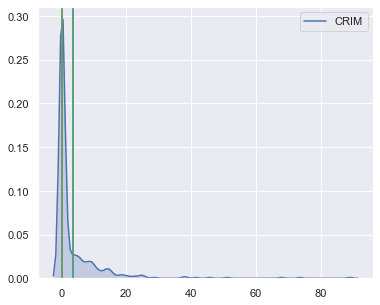

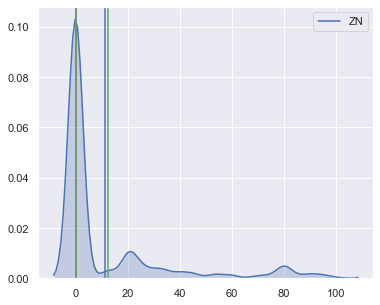

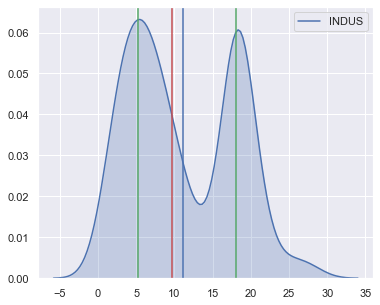

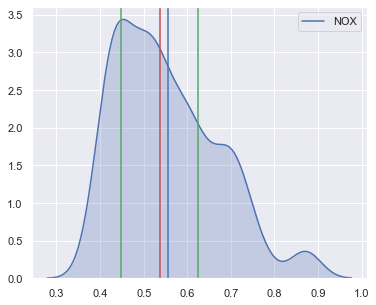

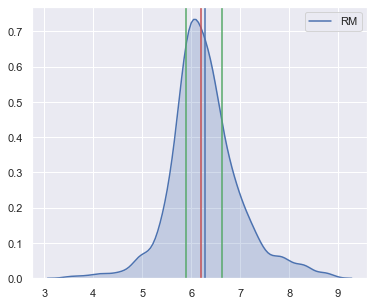

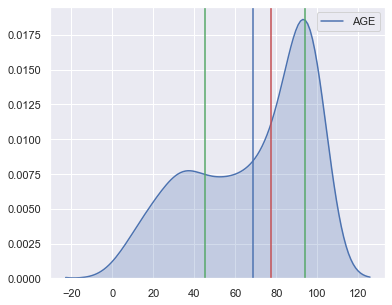

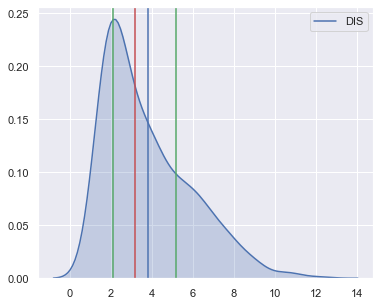

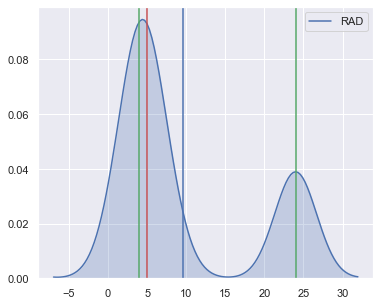

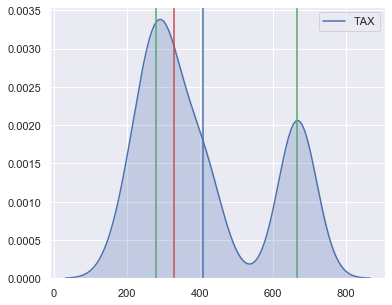

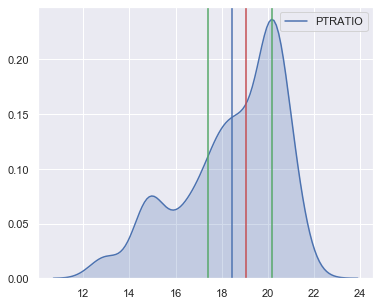

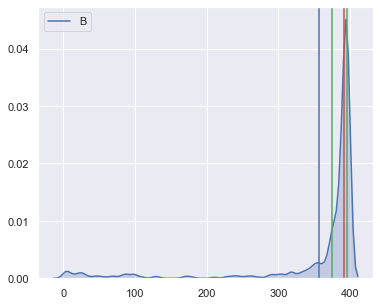

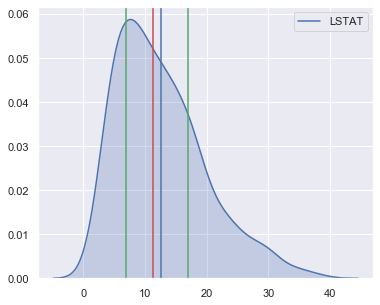

In [8]:
for col in boston.columns:
    if col != 'CHAS' and col != 'PRICE':       # bcz CHAS is discrete var
        kde_viz(boston,col)

Here we can see that most of variables are skewed, non-normalized and have outliers.

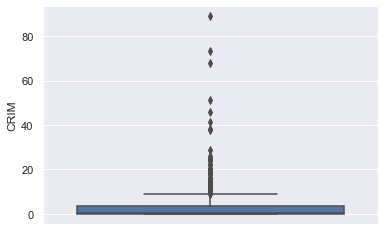

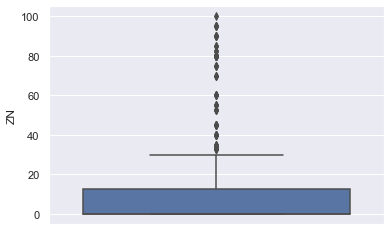

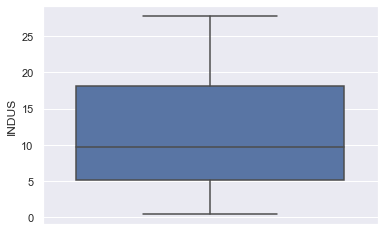

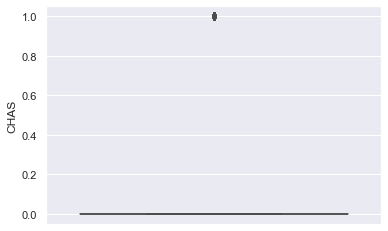

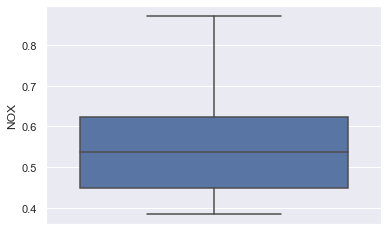

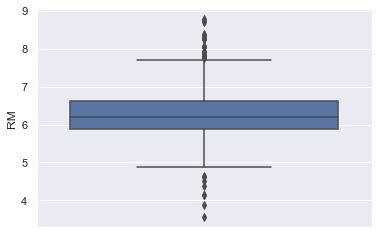

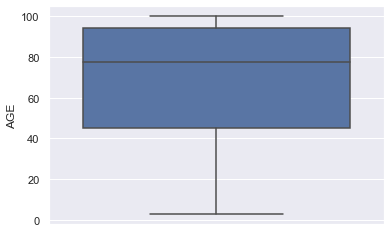

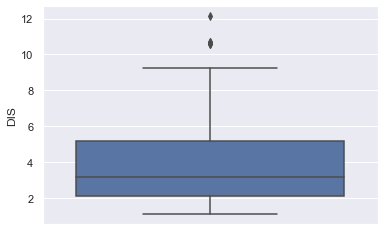

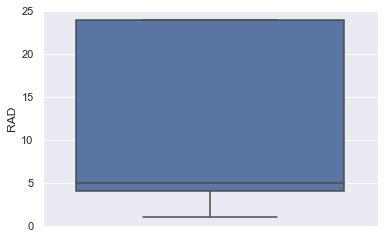

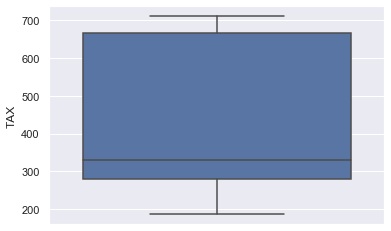

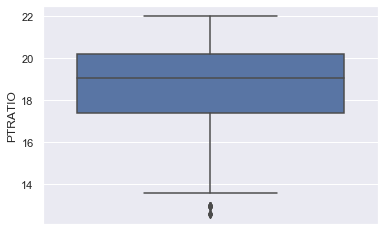

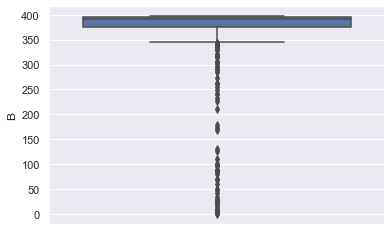

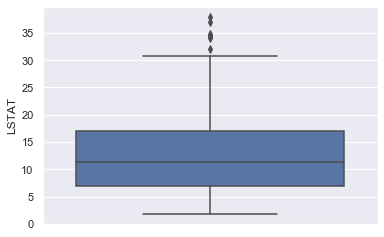

In [9]:
# plottinf Boxplot
for i in boston.columns:
    if i != 'PRICE':
        plt.figure()
        sns.boxplot(y=boston[i])

Here we can see that the CRIM,ZN,RM,B have some outliers so we will handle them later.

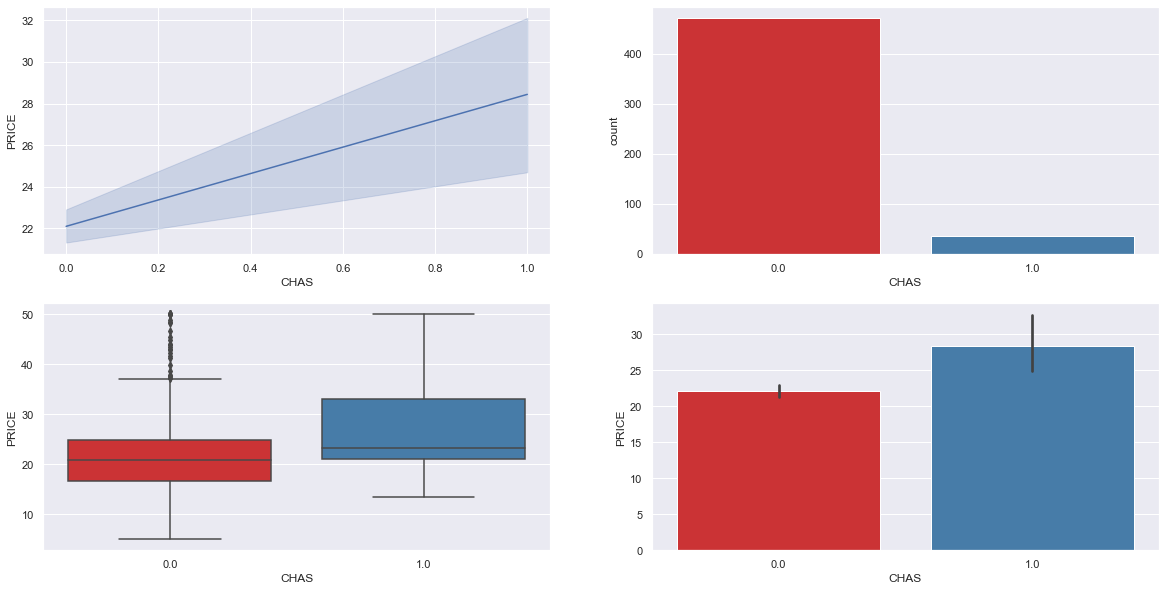

In [10]:
# We have 2 dicsrete variables. So lets analyse them
fig,ax = plt.subplots(2,2,figsize=(20,10))

sns.lineplot(boston['CHAS'],boston['PRICE'],palette='Set1',ax=ax[0][0])
sns.countplot(boston['CHAS'],palette='Set1',ax=ax[0][1])
sns.boxplot(boston['CHAS'],boston['PRICE'],ax=ax[1][0],palette='Set1')
sns.barplot(boston['CHAS'],boston['PRICE'],ax=ax[1][1],palette='Set1')

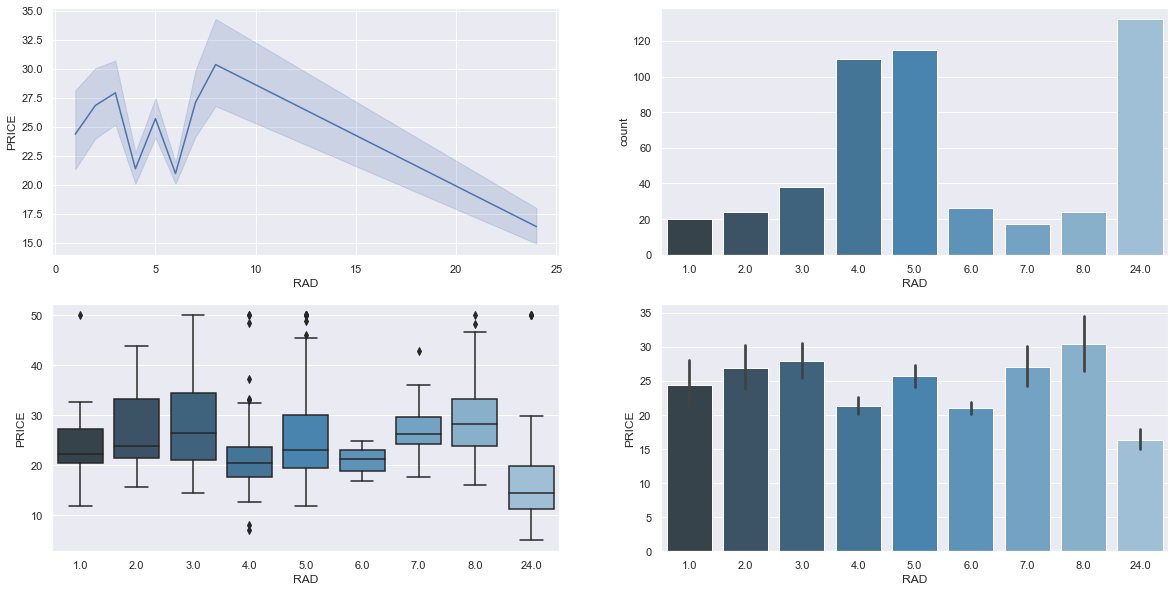

In [11]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

sns.lineplot(boston['RAD'],boston['PRICE'],palette='Blues_d',ax=ax[0][0])
sns.countplot(boston['RAD'],palette='Blues_d',ax=ax[0][1])
sns.boxplot(boston['RAD'],boston['PRICE'],ax=ax[1][0],palette='Blues_d')
sns.barplot(boston['RAD'],boston['PRICE'],ax=ax[1][1],palette='Blues_d')

We don't see much of the observations, but we can say that PRICE is greater than 25 for the RAD 2,3,5,7, and 8.

##### Variable Transfromation
We have seen that most of the features have outliers. So we try to transform our data and then see if there are outlier present or not

In [12]:
X = boston.drop('PRICE',axis=1)
Y = boston['PRICE']

# spliting into train, test
x_tr,x_ts,y_tr,y_ts = train_test_split(X,Y,test_size=.3,random_state=43)

In [13]:
discrete_cols = [col for col in X.columns if X[col].nunique()>50]
print(discrete_cols)

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'B', 'LSTAT']


In [14]:
from feature_engine.variable_transformers import YeoJohnsonTransformer,BoxCoxTransformer

# fitting data to YeoJohnson Transformer
yeo_tf = YeoJohnsonTransformer()
yeo_tr = yeo_tf.fit_transform(x_tr)

C:\Users\sahil\anaconda3\lib\site-packages\scipy\stats\morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\sahil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\sahil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\sahil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\sahil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1986: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\sahil\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1987: RuntimeWarning: invalid value encountered in dou

In [15]:
# grabbing non-zero columns becasue box-cox transformation does not work with 0 values
non_zero = []
for feature in x_tr.columns:
    if 0 in x_tr[feature].unique():
        pass
    else:
        non_zero.append(feature)
print(non_zero)

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [16]:
# fitting data to BOXCOX Transformer
box_tf = BoxCoxTransformer(variables=non_zero)
box_tr = box_tf.fit_transform(x_tr)

# transforming Test data 
yeo_ts = yeo_tf.transform(x_ts)
box_ts = box_tf.transform(x_ts)

In [17]:
def diagnostic_plots(df, variable):
    '''Function that plots Histogram, Q-Q Plot and Boxplot for visualising the outliers and distribution of the data'''
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

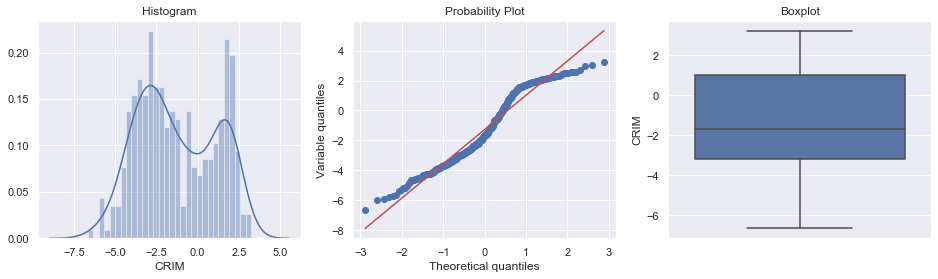

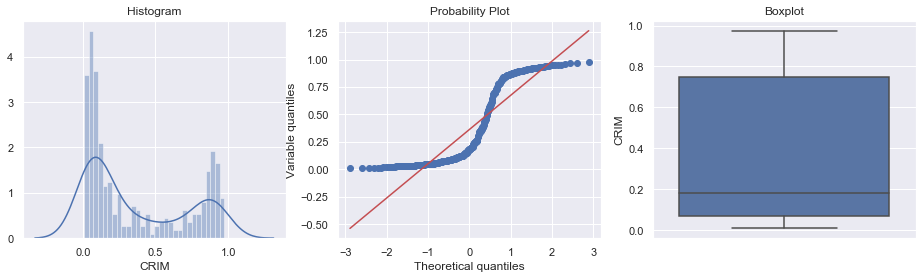

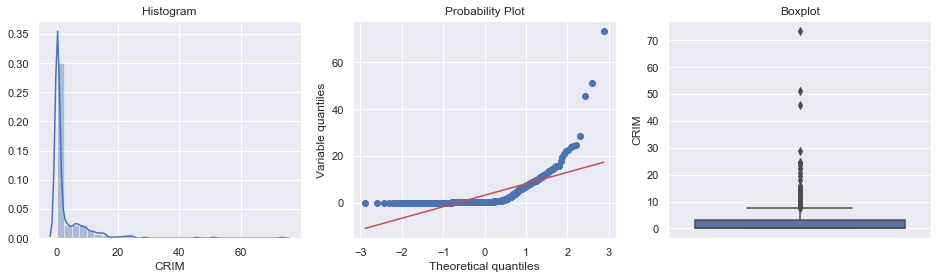

(None, None, None)

In [18]:
# 1. BoxCox 2. YeoJhonson 3. Original Distribution
diagnostic_plots(box_tr,'CRIM'),diagnostic_plots(yeo_tr,'CRIM'),diagnostic_plots(x_tr,'CRIM')

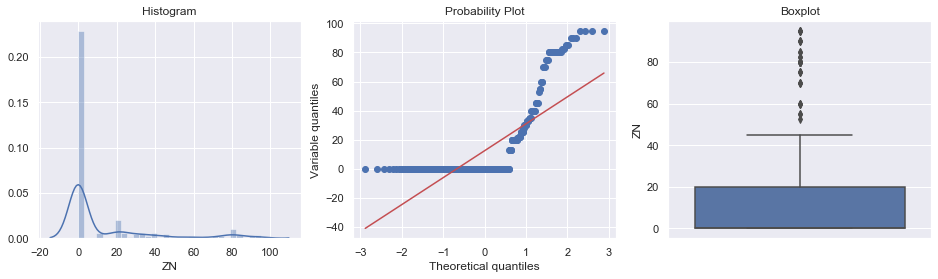

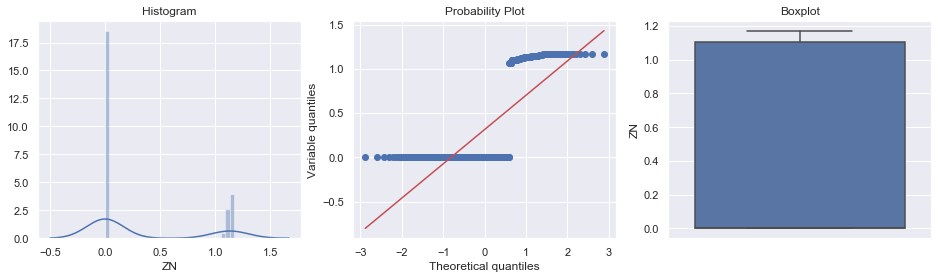

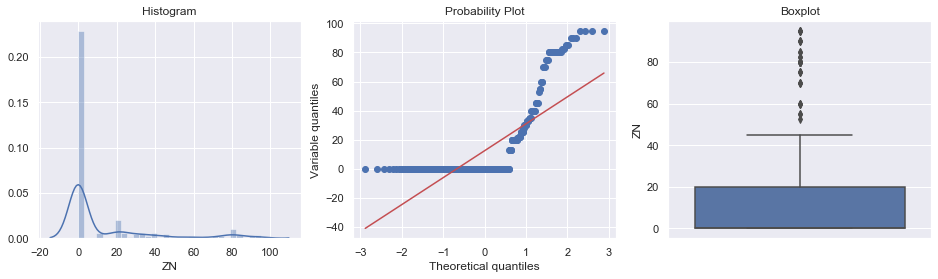

(None, None, None)

In [19]:
diagnostic_plots(box_tr,'ZN'),diagnostic_plots(yeo_tr,'ZN'),diagnostic_plots(x_tr,'ZN')

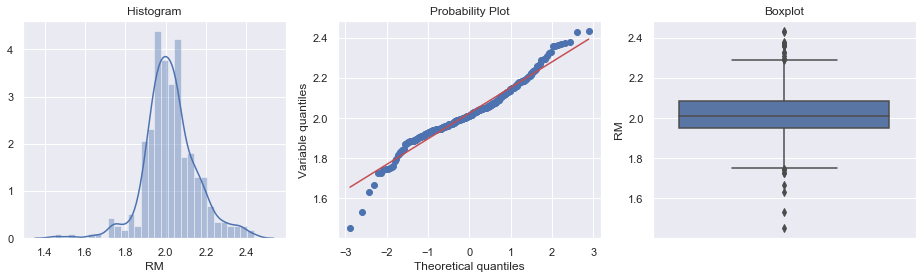

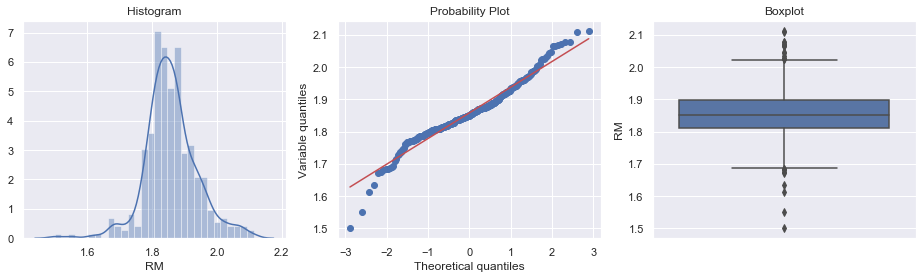

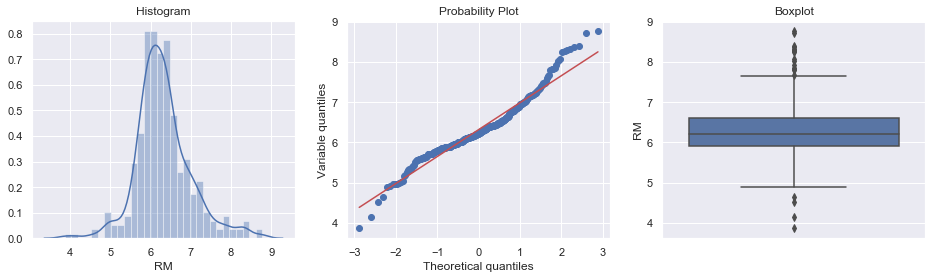

(None, None, None)

In [20]:
diagnostic_plots(box_tr,'RM'),diagnostic_plots(yeo_tr,'RM'),diagnostic_plots(x_tr,'RM')

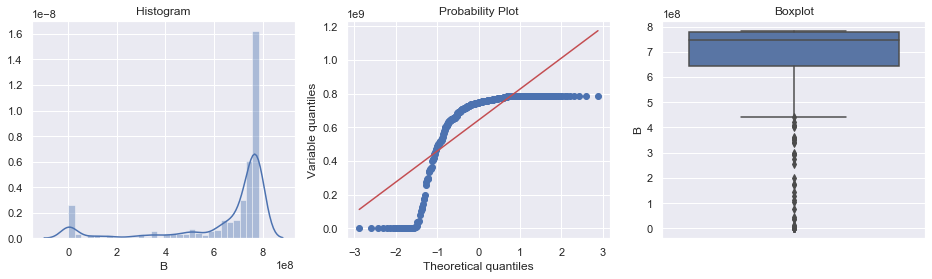

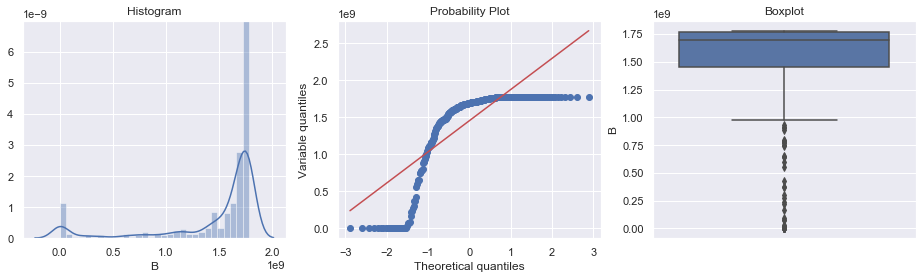

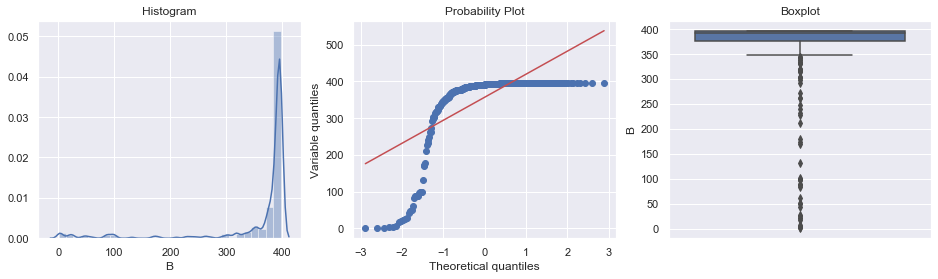

(None, None, None)

In [21]:
diagnostic_plots(box_tr,'B'),diagnostic_plots(yeo_tr,'B'),diagnostic_plots(x_tr,'B')

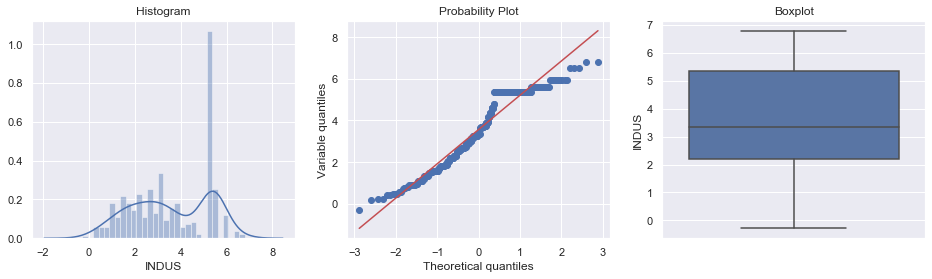

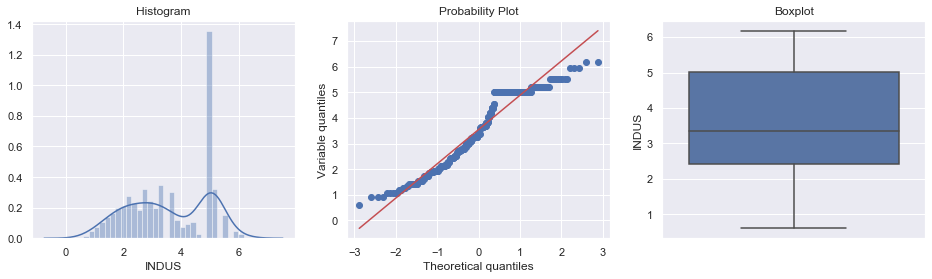

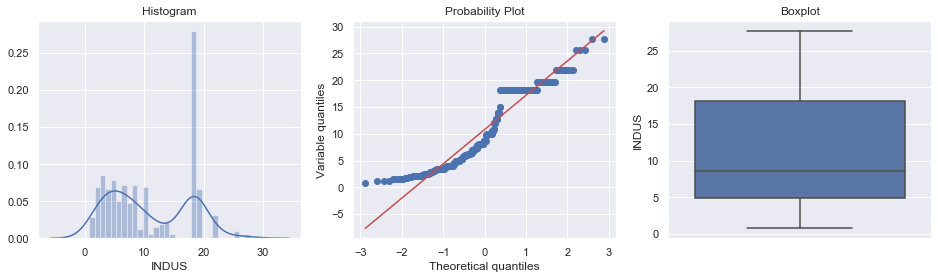

(None, None, None)

In [22]:
diagnostic_plots(box_tr,'INDUS'),diagnostic_plots(yeo_tr,'INDUS'),diagnostic_plots(x_tr,'INDUS')

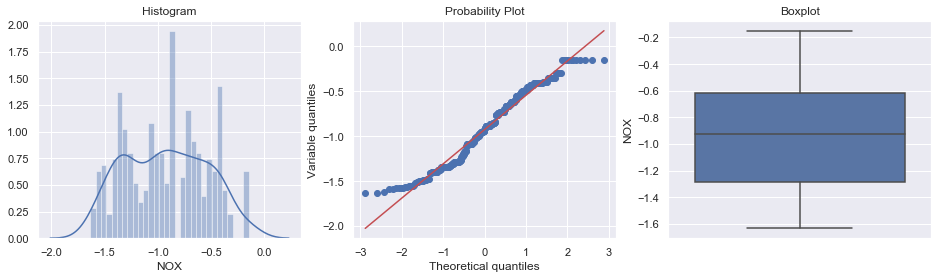

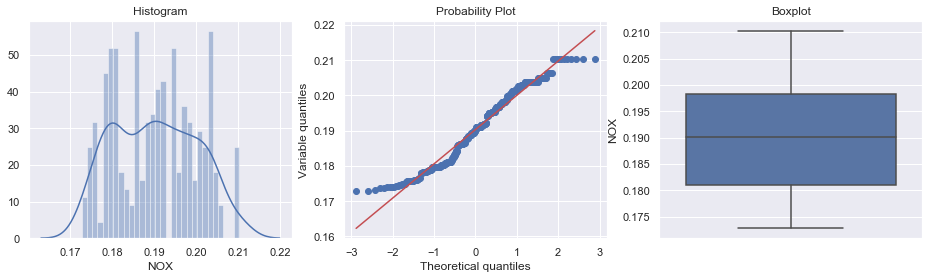

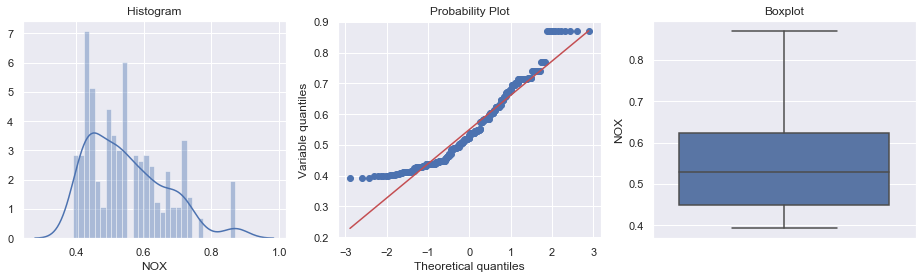

(None, None, None)

In [23]:
diagnostic_plots(box_tr,'NOX'),diagnostic_plots(yeo_tr,'NOX'),diagnostic_plots(x_tr,'NOX')

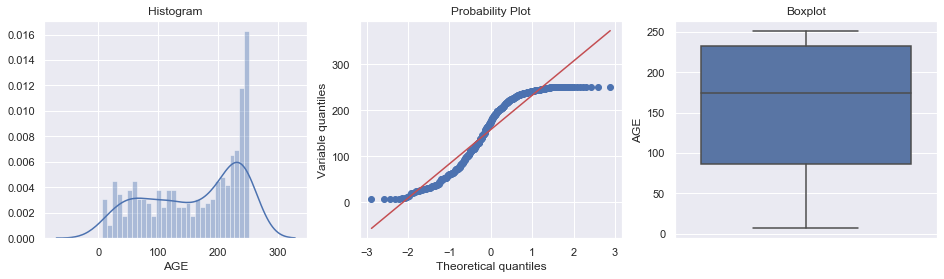

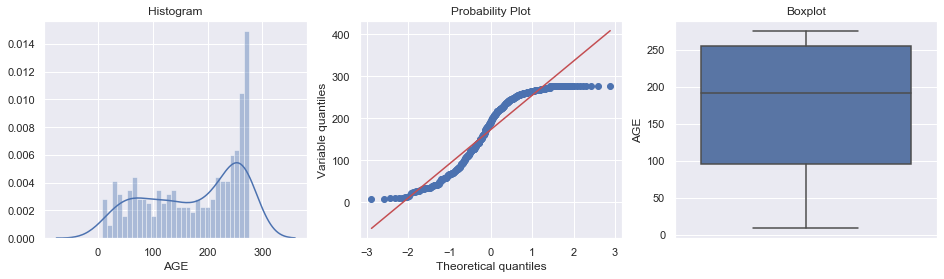

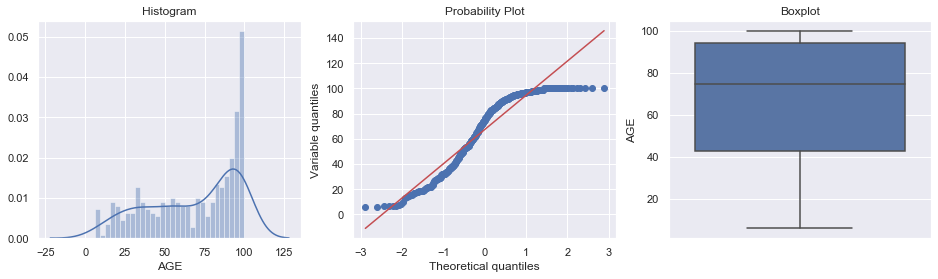

(None, None, None)

In [24]:
diagnostic_plots(box_tr,'AGE'),diagnostic_plots(yeo_tr,'AGE'),diagnostic_plots(x_tr,'AGE')

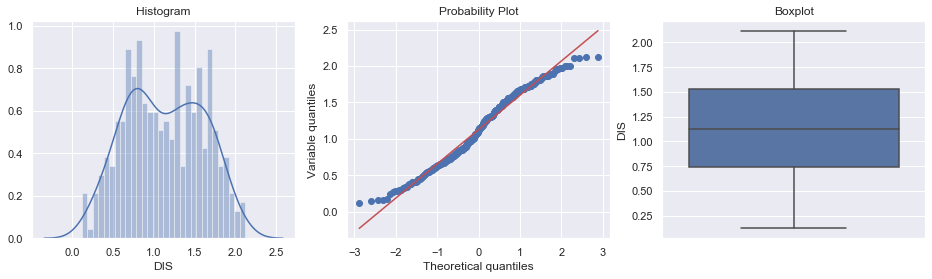

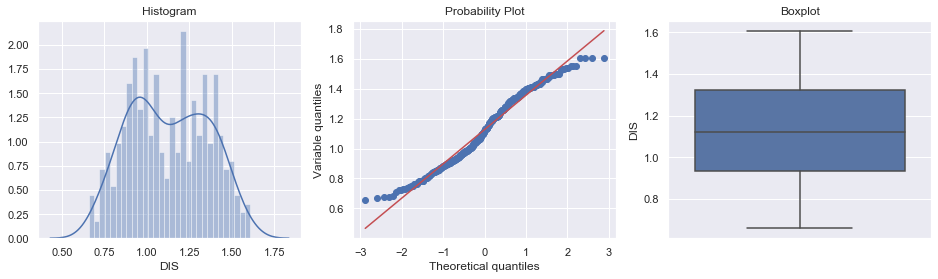

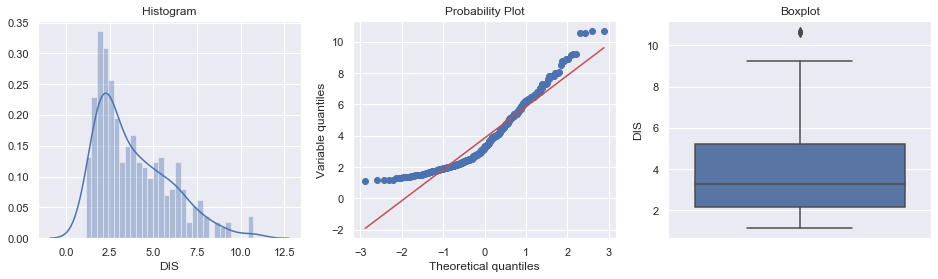

(None, None, None)

In [25]:
diagnostic_plots(box_tr,'DIS'),diagnostic_plots(yeo_tr,'DIS'),diagnostic_plots(x_tr,'DIS')

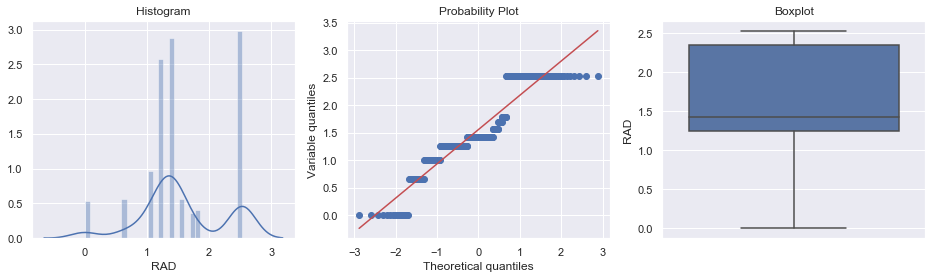

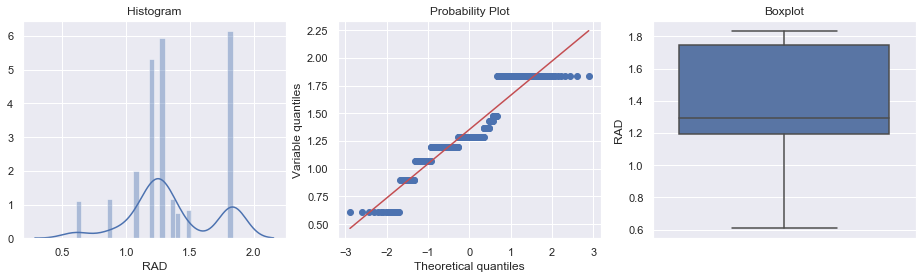

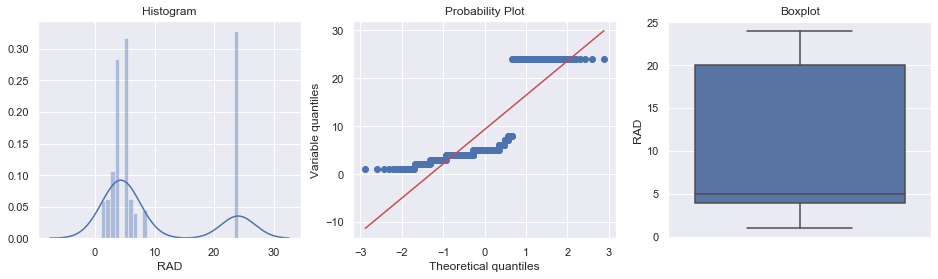

(None, None, None)

In [26]:
diagnostic_plots(box_tr,'RAD'),diagnostic_plots(yeo_tr,'RAD'),diagnostic_plots(x_tr,'RAD')

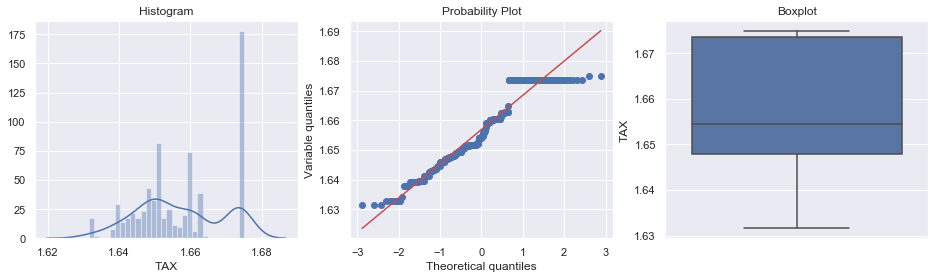

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


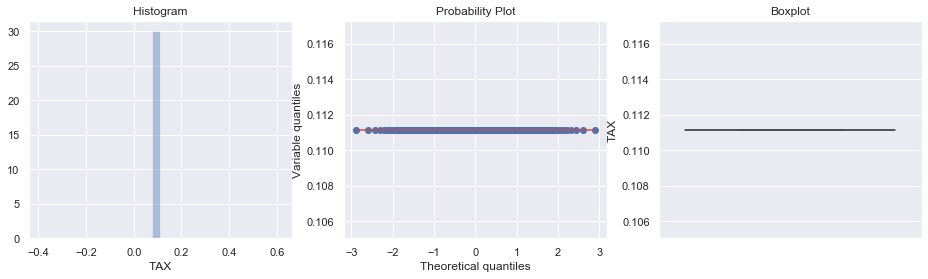

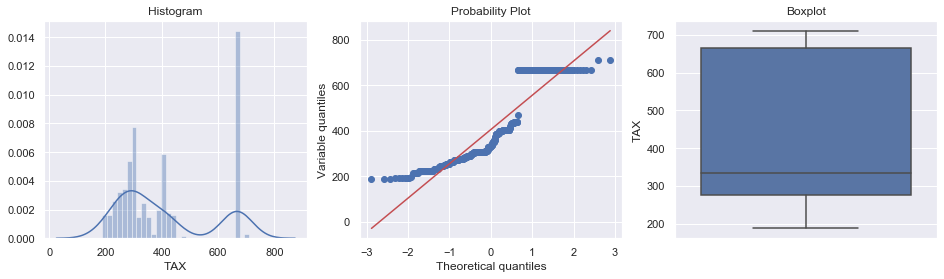

(None, None, None)

In [27]:
diagnostic_plots(box_tr,'TAX'),diagnostic_plots(yeo_tr,'TAX'),diagnostic_plots(x_tr,'TAX')

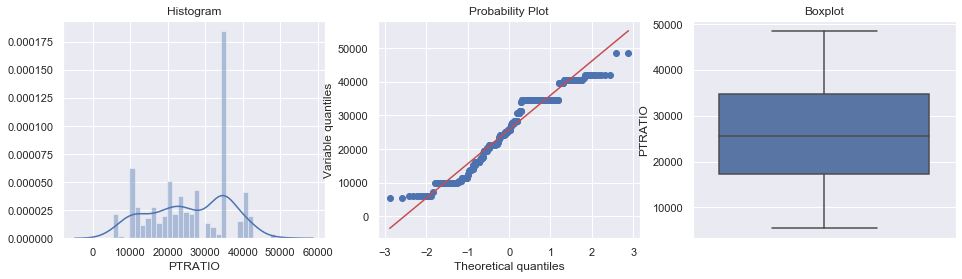

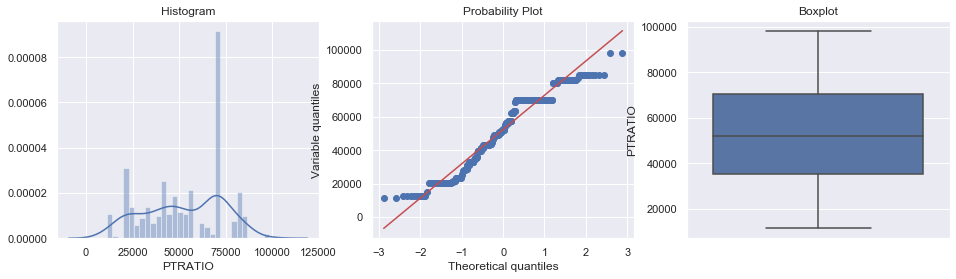

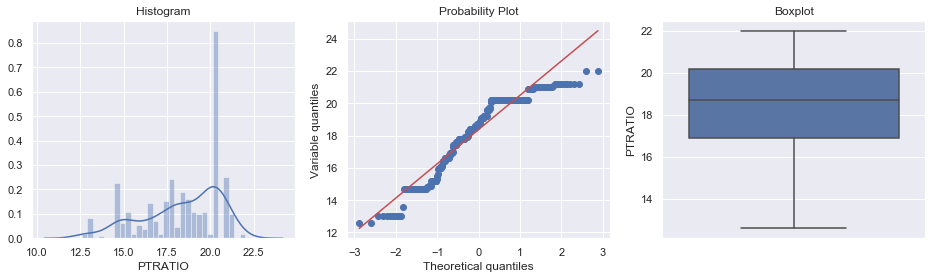

(None, None, None)

In [28]:
diagnostic_plots(box_tr,'PTRATIO'),diagnostic_plots(yeo_tr,'PTRATIO'),diagnostic_plots(x_tr,'PTRATIO')

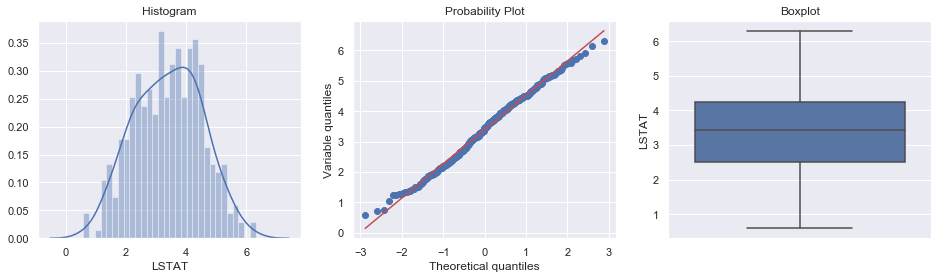

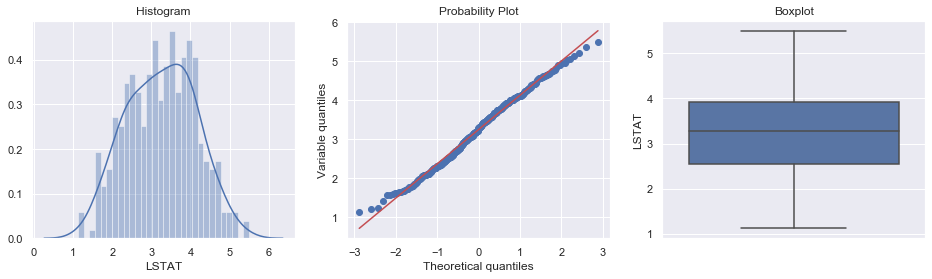

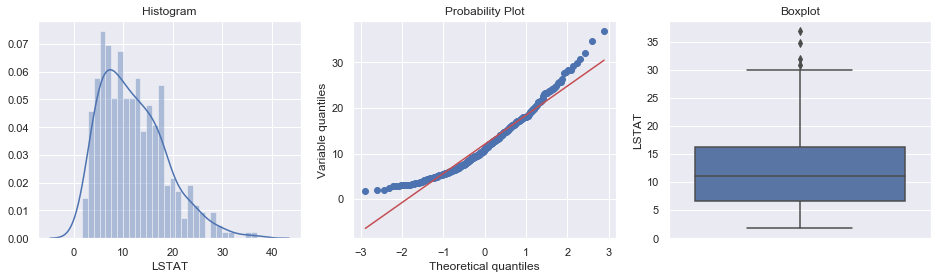

(None, None, None)

In [29]:
diagnostic_plots(box_tr,'LSTAT'),diagnostic_plots(yeo_tr,'LSTAT'),diagnostic_plots(x_tr,'LSTAT')

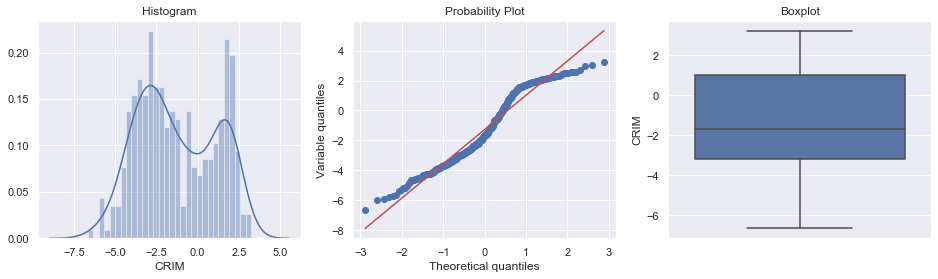

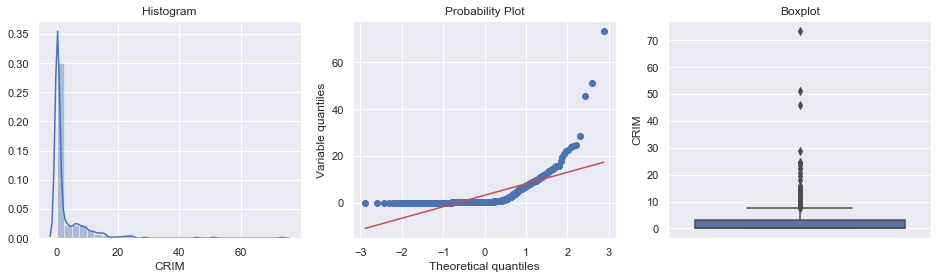

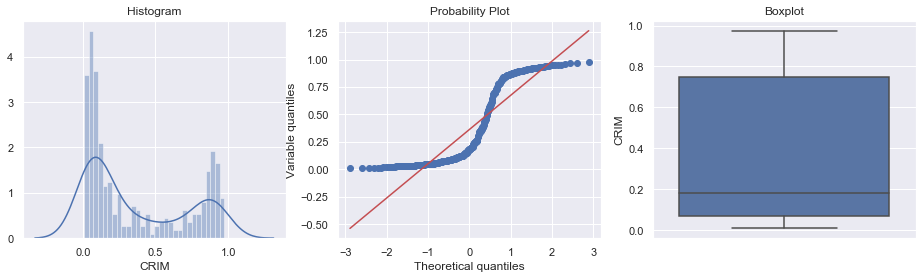

(None, None, None)

In [30]:
diagnostic_plots(box_tr,'CRIM'),diagnostic_plots(x_tr,'CRIM'),diagnostic_plots(yeo_tr,'CRIM')

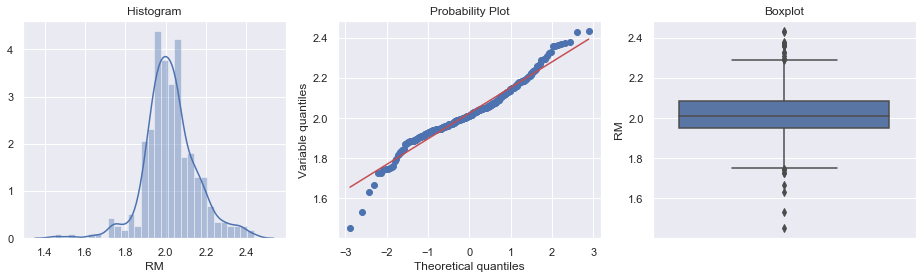

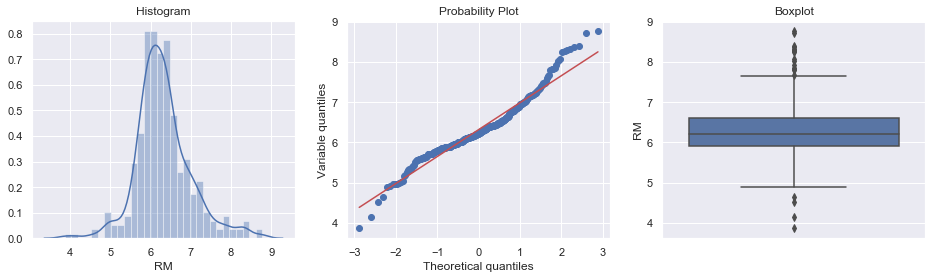

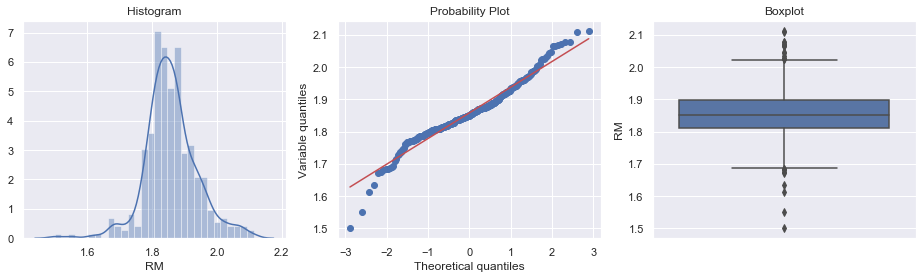

(None, None, None)

In [31]:
diagnostic_plots(box_tr,'RM'),diagnostic_plots(x_tr,'RM'),diagnostic_plots(yeo_tr,'RM')

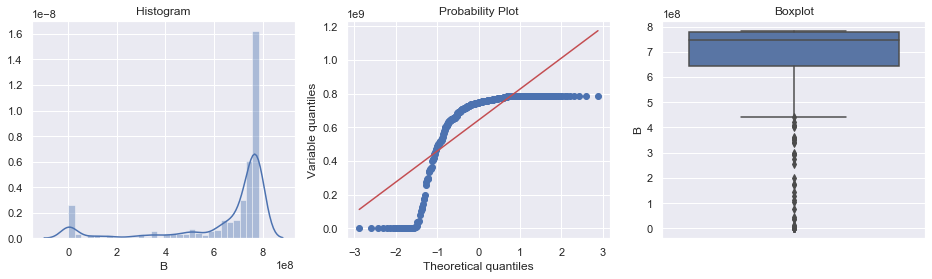

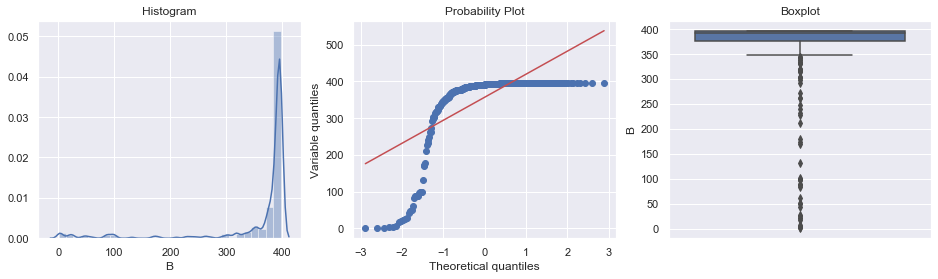

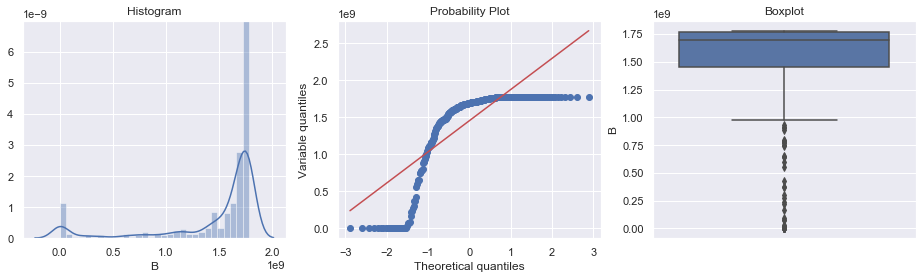

(None, None, None)

In [32]:
diagnostic_plots(box_tr,'B'),diagnostic_plots(x_tr,'B'),diagnostic_plots(yeo_tr,'B')

If we have to pick one transformer from YeoJhonson and the BOXCOX Transfromer We will pick the BOXCOX.

Here we applied two different transfromations on the data. So we will pick the best transformed variables from the different different Transformers.

In [33]:
# Making DataFrame from the different optimal variables
transformed_tr = pd.DataFrame(data=[box_tr['CRIM'],yeo_tr['ZN'],box_tr['RM'],box_tr['B'],yeo_tr['INDUS'],yeo_tr['NOX'],box_tr['DIS'],x_tr['AGE'],box_tr['TAX'],x_tr['RAD'],box_tr['PTRATIO'],box_tr['LSTAT']])
transformed_tr = transformed_tr.T

In [34]:
# Test Transformed Data
transformed_ts = pd.DataFrame(data=[box_ts['CRIM'],yeo_ts['ZN'],box_ts['RM'],box_ts['B'],yeo_ts['INDUS'],yeo_ts['NOX'],box_ts['DIS'],x_ts['AGE'],box_ts['TAX'],x_ts['RAD'],box_ts['PTRATIO'],box_ts['LSTAT']])
transformed_ts = transformed_ts.T

Now lets Check the performance of the model at this point

In [58]:
def adj_r2_linear(x,y):
    r2 = lr_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

def adj_r2_lasso(x,y):
    r2 = lasso_model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

lr_model = LinearRegression()
std = StandardScaler()

std_tr = std.fit_transform(transformed_tr)
std_ts = std.transform(transformed_ts)

# Building Polynomial Regression Model
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(std_tr)
X_poly_ts = poly_reg.transform(std_ts)

lr_model.fit(X_poly,y_tr)
lr_model.score(X_poly,y_tr),lr_model.score(X_poly_ts,y_ts)

(0.929230792492704, 0.8821006732089702)

In [60]:
adj_r2_linear(X_poly,y_tr),adj_r2_linear(X_poly_ts,y_ts)

(0.9046506479004752, 0.7032866942425751)

Here we can see that we got an test R2 of 88% but the Adjusted-R2 is quite low. So we can say that the model is overfitting as there is a lot of difference between the Train and Test Score.

In [61]:
# Building Linear Regression Model
lr_model = LinearRegression()

lr_model.fit(std_tr,y_tr)
lr_model.score(std_tr,y_tr),lr_model.score(std_ts,y_ts)

(0.7756475081121516, 0.7257346164963817)

In [62]:
adj_r2_linear(std_tr,y_tr),adj_r2_linear(std_ts,y_ts)

(0.7677524057583269, 0.7020570294313211)

In [67]:
# Build Lasso Regression Model and let's see the results
from sklearn.linear_model import LassoCV,Lasso
alphas = np.random.uniform(0,1,100)

lassoCV = LassoCV(alphas=alphas)
lassoCV.fit(X_poly,y_tr)

LassoCV(alphas=array([0.70003868, 0.77219045, 0.49656695, 0.42488879, 0.160541  ,
       0.0315799 , 0.81615205, 0.9272509 , 0.50886392, 0.06905149,
       0.99640399, 0.73097373, 0.83872439, 0.96585336, 0.01741711,
       0.36281851, 0.06700706, 0.67434539, 0.89305116, 0.29370701,
       0.5895684 , 0.42657909, 0.78814693, 0.57851091, 0.92179323,
       0.04890807, 0.99460014, 0.85054352, 0.96752525, 0.62432749,
       0.0...
       0.71313464, 0.23701173, 0.63420045, 0.49286816, 0.4664783 ,
       0.56190536, 0.63051212, 0.22312052, 0.49070762, 0.10496648,
       0.92186916, 0.59446866, 0.7437559 , 0.64626361, 0.40044176]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [68]:
lasso_model = Lasso(alpha=lassoCV.alpha_)
lasso_model.fit(X_poly,y_tr)
lasso_model.score(X_poly,y_tr),lasso_model.score(X_poly_ts,y_ts)

(0.913843433899695, 0.8746135034722035)

In [69]:
print('Adjused R-squared score of Lasso Model')
adj_r2_lasso(X_poly,y_tr),adj_r2_lasso(X_poly_ts,y_ts)

Adjused R-squared score of Lasso Model


(0.8839188250633295, 0.6844439837383787)

Lasso Regression is also not improving the Adj-R2 score

#### Feature Selection
We have seen our model with all the variables, now lets try to build using the feature selection by using differrent techniques.

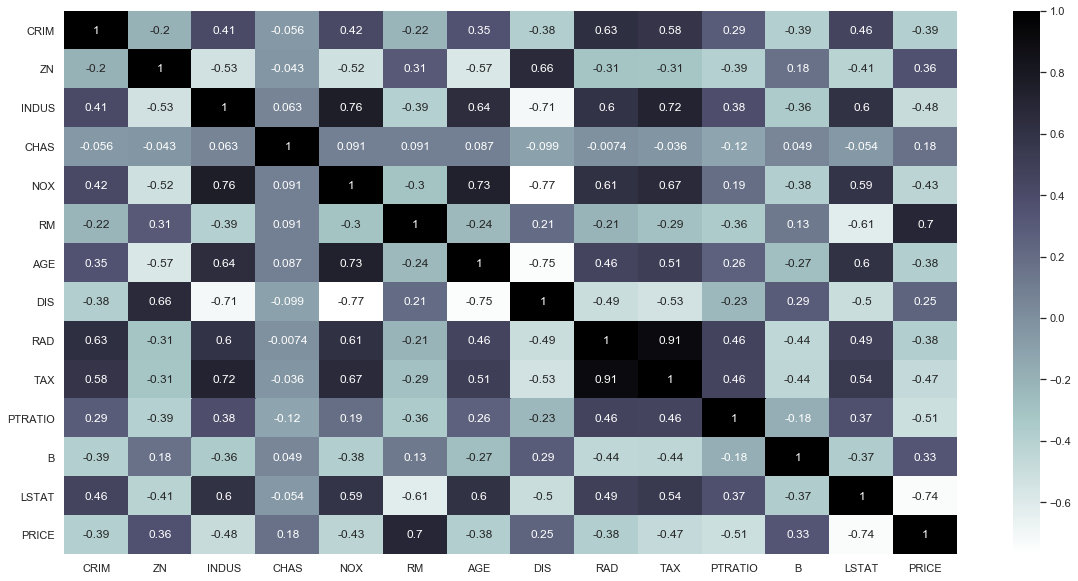

In [40]:
# corrlation
corr = boston.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap=plt.cm.bone_r)

RAD and TAX are correlated so we drop one of them.

In [41]:
# VIF factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
variables = std_tr
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif['features'] = transformed_tr.columns

vif

,VIF Factor,features
0,6.476453,CRIM
1,2.134528,ZN
2,1.989620,RM
3,1.449425,B
4,3.991710,INDUS
5,7.049458,NOX
6,5.080650,DIS
7,3.970213,AGE
8,3.782056,TAX
9,5.081533,RAD


As we can see that all the features have VIF less than 10. So we keep all of them.

#### PCA Decompostion

In [44]:
# pca for finding the best value of n_components
from sklearn.decomposition import PCA
def find_n(tr_data,ts_data,tr_label,ts_label):
    r2_ts = []
    r2_tr = []
    
    r2_poly_ts = []
    r2_poly_tr = []
    for i in range(1,13):
        pca = PCA(n_components=i)
        pca_tr = pca.fit_transform(tr_data)
        pca_ts = pca.transform(ts_data)
        
        # Linear Regression =
        lr_model = LinearRegression()
        lr_model.fit(pca_tr,y_tr)
        r2_ts.append(lr_model.score(pca_ts,ts_label))
        r2_tr.append(lr_model.score(pca_tr,tr_label))
        
        # polynomial regression
        poly_reg = PolynomialFeatures(degree = 2) 
        X_poly = poly_reg.fit_transform(pca_tr)
        X_poly_ts = poly_reg.transform(pca_ts)
        
        lr_model2 = LinearRegression()
        lr_model2.fit(X_poly,y_tr)
        r2_poly_tr.append(lr_model2.score(X_poly,y_tr))
        r2_poly_ts.append(lr_model2.score(X_poly_ts,y_ts))
        
    max_lr =max(r2_ts)
    print('Maximum Test Accucracy of Linear Model = {} at n_components = {}'.format(max(r2_ts)*100,r2_ts.index(max_lr)))
    max_poly = max(r2_poly_ts)
    print('Maximum Test Accucracy of Polynomial Model = {} at n_components = {}'.format(max(r2_poly_ts)*100,r2_poly_ts.index(max_poly)+1))

    fig,ax = plt.subplots(1,2,figsize=(20,7))
    sns.lineplot(range(1,13),r2_ts,ax=ax[0])
    sns.lineplot(range(1,13),r2_tr,ax=ax[0])
    
    sns.lineplot(range(1,13),r2_poly_ts,ax=ax[1])
    sns.lineplot(range(1,13),r2_poly_tr,ax=ax[1])
    
    
    plt.show()

Maximum Test Accucracy of Linear Model = 72.57346164963818 at n_components = 11
Maximum Test Accucracy of Polynomial Model = 89.10654233601132 at n_components = 11


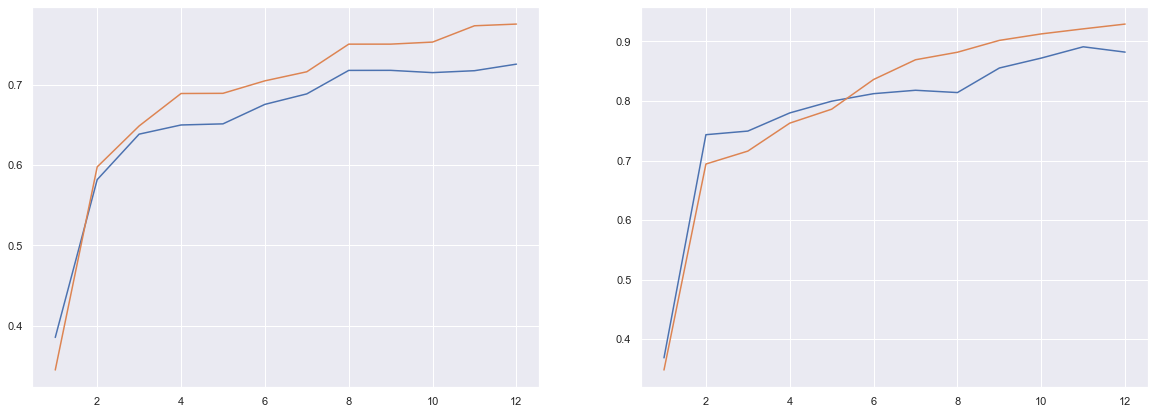

In [45]:
std_tr = pd.DataFrame(std_tr)
std_ts = pd.DataFrame(std_ts)

find_n(std_tr,std_ts,y_tr,y_ts)

Now we will try to build both Linear and Polynomial feature model by using the best value of n_component and we pick this value on the basis of adjusted r-squared score.

In [46]:
# Building Polynomial features Linear Model
lr_model = LinearRegression()

# fitting data to PCA with n_components=5
pca = PCA(n_components=6)
pca_tr = pca.fit_transform(std_tr)
pca_ts = pca.transform(std_ts)

# building Polynomial Features
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(pca_tr)
X_poly_ts = poly_reg.transform(pca_ts)

# training model
lr_model.fit(X_poly,y_tr)
lr_model.score(X_poly,y_tr),lr_model.score(X_poly_ts,y_ts)

(0.8361389037287122, 0.8123097957163412)

In [47]:
adj_r2_linear(X_poly,y_tr),adj_r2_linear(X_poly_ts,y_ts)

(0.8220216400499551, 0.7695835703509555)

In [48]:
# Build Lasso Regression Model and let's see the results
from sklearn.linear_model import LassoCV,Lasso
alphas = np.random.uniform(0,1,100)

lassoCV = LassoCV(alphas=alphas)
lassoCV.fit(X_poly,y_tr)

LassoCV(alphas=array([0.72139586, 0.34969288, 0.97893625, 0.0560844 , 0.04672942,
       0.99779712, 0.63993548, 0.16570444, 0.7550936 , 0.62221488,
       0.67324164, 0.54670234, 0.32860786, 0.64383194, 0.30430155,
       0.52334622, 0.88778304, 0.2702433 , 0.45014858, 0.12977882,
       0.48039318, 0.84833468, 0.89405993, 0.4408799 , 0.47351606,
       0.45565144, 0.36329379, 0.54467848, 0.87095369, 0.08938948,
       0....
       0.30970912, 0.53213982, 0.57436372, 0.30056942, 0.47103682,
       0.39689831, 0.39178982, 0.33172575, 0.63169557, 0.34094696,
       0.74532061, 0.42935584, 0.4414704 , 0.04190569, 0.12935206]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [49]:
lasso_model = Lasso(alpha=lassoCV.alpha_)
lasso_model.fit(X_poly,y_tr)
lasso_model.score(X_poly,y_tr),lasso_model.score(X_poly_ts,y_ts)

(0.8346991918386368, 0.8216013845901531)

In [50]:
print('Adjused R-squared score of Lasso Model')
adj_r2_lasso(X_poly,y_tr),adj_r2_lasso(X_poly_ts,y_ts)

Adjused R-squared score of Lasso Model


(0.8204578914431964, 0.7809903176675863)

In [51]:
# Building Linear Regeression Model
lr_model = LinearRegression()

# fitting data to PCA with n_components=8
pca = PCA(n_components=8)
pca_tr = pca.fit_transform(std_tr)
pca_ts = pca.transform(std_ts)

# training model
lr_model.fit(pca_tr,y_tr)
lr_model.score(pca_tr,y_tr),lr_model.score(pca_ts,y_ts)

(0.7506379532628994, 0.7179403767844975)

In [52]:
adj_r2_linear(pca_tr,y_tr),adj_r2_linear(pca_ts,y_ts)

(0.7448556449327637, 0.7021608174437701)

In [70]:
# Build Lasso Regression Model 
alphas = np.random.uniform(0,1,100)

lassoCV = LassoCV(alphas=alphas)
lassoCV.fit(pca_tr,y_tr)

LassoCV(alphas=array([0.56954626, 0.0523976 , 0.73534906, 0.5972153 , 0.09134028,
       0.61249493, 0.03092533, 0.53054372, 0.3900276 , 0.70548168,
       0.01475862, 0.85355553, 0.19432757, 0.45948135, 0.40464767,
       0.43789394, 0.30160257, 0.59281179, 0.55016859, 0.56872589,
       0.50347942, 0.02588806, 0.71708156, 0.40464449, 0.47965367,
       0.60602091, 0.38144972, 0.31112551, 0.50397959, 0.933642  ,
       0.3...
       0.87676355, 0.45376845, 0.60986059, 0.19036197, 0.89324639,
       0.27188386, 0.36565986, 0.57088827, 0.94038748, 0.35402478,
       0.77703256, 0.25566248, 0.68803372, 0.71994419, 0.63954727]),
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [71]:
lasso_model = Lasso(alpha=lassoCV.alpha_)
lasso_model.fit(pca_tr,y_tr)
lasso_model.score(pca_tr,y_tr),lasso_model.score(pca_ts,y_ts)

(0.7505995556485103, 0.7181054429653035)

In [75]:
adj_r2_lasso(pca_tr,y_tr),adj_r2_lasso(pca_ts,y_ts)

(0.7448163569389106, 0.7023351180962296)

    MODEL                                        Adj-r2 Score(Train,Test)
    Polynomial regression                          (90.46%, 70.32%)      
    Linear Regression                              (76.77%, 70.2%)
    Lasso Regression                               (88.39%, 68.44%)
    
    Polynomial Regression(PCA n_comp=6)            (83.61%, 81.23%)
    Lasso Regression Ploynomial feature Model      (82.04%, 78.09%)
    
    Linear Regression(PCA n_comp=8)                (74.48%, 70.21%)
    Lasso Regression(PCA n_comp=8)                 (74.48%, 70.23%)